In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [2]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [3]:
data.head()

,state,county,hour_blue_perc,density_km,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),...,percent_65_and_over,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,22.86,35.436,42,28,1,0.097121,5.660377,0.002312,...,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
1,Alabama,Baldwin,22.86,44.261,52,59,1,0.103695,2.645503,0.001994,...,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
2,Alabama,Barbour,22.86,11.979,32,39,1,0.171177,2.127660,0.005349,...,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
3,Alabama,Bibb,22.86,14.215,36,38,0,0.187650,0.000000,0.005213,...,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286,0.268210,46.781250,68.352607
4,Alabama,Blount,22.86,34.325,41,26,0,0.069781,0.000000,0.001702,...,18.236515,1.462656,0.653527,0.319848,0.121024,9.571231,86.886238,1.724520,50.726141,89.951502


In [4]:
data.columns

Index(['state', 'county', 'hour_blue_perc', 'density_km', 'days_counted',
       'case_count_28_days', 'death_count_28_days',
       'confirmed_infection(%_of_pop)', 'death_perc(%_of_case)',
       'avg_daily_case_increase(%_of_pop)', 'case_count_28_days(%_of_pop)',
       'death_count_28_days(%_of_case)', 'percent_fair_or_poor_health',
       'percent_low_birthweight', 'percent_smokers',
       'percent_adults_with_obesity', 'food_environment_index',
       'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_percentil

In [5]:
excluded_columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_28_days(%_of_pop)', 
    'death_count_28_days(%_of_case)',
    'presence_of_water_violation',
    'hour_blue_perc'
    
]

In [6]:
data_subset = data[excluded_columns]

In [7]:
main_data = data.drop(excluded_columns, axis=1)

In [8]:
main_data.columns

Index(['density_km', 'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_percentile_income', 'percent_single_parent_households',
       'social_association_rate', 'injury_death_rate', 'average_daily_pm2_5',
       'percent_severe_housing_problems', 'severe_housing_cost_burden',
       'overcrowding', 'inadequate_facilities', 'percent_drive_alone_to_work',
       'percent_lo

In [9]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [10]:
chi_square_value, p_value

(189684.9416499067, 0.0)

In [11]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [12]:
kmo_model

0.8519693034625644

In [13]:
main_data.shape

(2337, 59)

In [14]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [15]:
ev, v = fa.get_eigenvalues()

In [16]:
ev[:25]

array([16.85021948,  7.83794436,  4.77388366,  3.20869048,  2.30515415,
        1.95570065,  1.6528739 ,  1.48682372,  1.22795797,  1.19663304,
        1.08912919,  1.06250146,  0.97859195,  0.8724166 ,  0.85231612,
        0.72107843,  0.68981576,  0.64524771,  0.63227617,  0.61413041,
        0.57307228,  0.56781594,  0.53552116,  0.48215188,  0.4601244 ])

In [17]:
ev[25:]

array([4.25441565e-01, 3.96799518e-01, 3.79468729e-01, 3.50592427e-01,
       3.40574249e-01, 3.32457722e-01, 3.12985364e-01, 2.96749304e-01,
       2.77657386e-01, 2.58560698e-01, 2.41871024e-01, 2.32655199e-01,
       2.07153256e-01, 2.04347154e-01, 1.81519634e-01, 1.71581681e-01,
       1.52259954e-01, 1.38151363e-01, 1.33798472e-01, 1.13058427e-01,
       1.05401759e-01, 9.52825322e-02, 8.24356822e-02, 7.52928086e-02,
       5.57196690e-02, 5.15435043e-02, 3.73430185e-02, 2.87095176e-02,
       2.40466509e-02, 1.85680736e-02, 4.28260485e-03, 7.71458921e-04,
       4.52913333e-04, 3.95813348e-04])

In [18]:
fa.loadings_.shape

(59, 25)

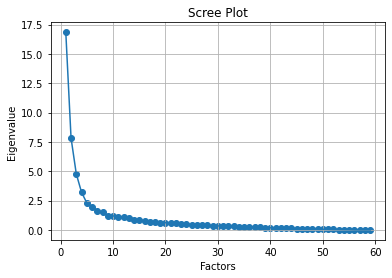

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1, main_data.shape[1]+1), ev)
plt.plot(range(1, main_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
fa = FactorAnalyzer()
fa.set_params(n_factors=10, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=10, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [21]:
fa.get_factor_variance()

(array([16.12574356,  5.04494823,  3.67734589,  3.13795756,  2.39899418,
         2.38207553,  2.11328026,  1.72190049,  1.61762544,  1.18927265]),
 array([0.27331769, 0.0855076 , 0.0623279 , 0.05318572, 0.04066092,
        0.04037416, 0.03581831, 0.02918475, 0.02741738, 0.02015716]),
 array([0.27331769, 0.35882528, 0.42115318, 0.4743389 , 0.51499982,
        0.55537398, 0.59119229, 0.62037705, 0.64779443, 0.66795159]))

In [22]:
factor_df = pd.DataFrame(fa.loadings_)

In [23]:
factor_df.index = main_data.columns

In [24]:
factor_df.shape

(59, 10)

In [25]:
pd.set_option('display.max_rows', None)
factor_df

,0,1,2,3,4,5,6,7,8,9
density_km,-0.190969,0.278865,0.092842,-0.057255,0.065690,0.080430,0.077609,-0.028876,0.658335,-0.019672
percent_fair_or_poor_health,0.896157,0.096043,0.236910,0.096603,0.124940,0.076978,0.066358,-0.064286,0.011405,0.008873
percent_low_birthweight,0.641714,0.171521,-0.061753,0.008199,0.000074,0.446996,0.108710,-0.066364,0.052860,0.095520
percent_smokers,0.832059,-0.078159,-0.213581,-0.137038,0.173080,-0.117117,0.027623,-0.006047,0.014367,0.002188
percent_adults_with_obesity,0.593716,-0.263770,-0.066348,-0.078663,0.124017,0.143215,0.032942,-0.130957,-0.108448,0.049675
food_environment_index,-0.711597,-0.236335,0.030554,-0.107808,-0.093270,-0.353509,0.196999,-0.257482,0.048578,0.126025
percent_physically_inactive,0.709811,-0.236826,-0.092255,0.095910,0.014820,0.029197,0.118265,-0.182370,0.009578,0.056121
percent_with_access_to_exercise_opportunities,-0.530291,0.304252,0.103956,-0.202652,0.025954,-0.055312,-0.262862,0.021404,0.134646,0.225225
percent_excessive_drinking,-0.674695,0.006089,-0.009987,-0.194009,0.125980,-0.075910,-0.156205,0.000366,-0.022137,-0.174867
percent_driving_deaths_with_alcohol_involvement,-0.054827,0.042360,0.006123,-0.141077,-0.063274,0.040893,0.021777,0.175612,-0.091447,-0.044806


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index

In [26]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [27]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [28]:
data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.022211
case_count_28_days                   0.327511
death_count_28_days                  0.264973
confirmed_infection(%_of_pop)        0.771089
death_perc(%_of_case)                0.065693
avg_daily_case_increase(%_of_pop)    0.837882
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.022168
hour_blue_perc                      -0.018564
0                                    0.058213
1                                    0.105802
2                                    0.014052
3                                    0.030603
4                                    0.013590
5                                    0.111854
6                                    0.080820
7                                   -0.074227
8                                    0.021293
9                                   -0.057024
Name: case_count_28_days(%_of_pop), dtype: float64

In [29]:
data.shape

(2337, 22)

In [170]:
blue_data = data[data['hour_blue_perc'] >= 50]

In [171]:
light_red_data = data[(data['hour_blue_perc'] < 50) & (data['hour_blue_perc'] >= 40)]

In [172]:
red_data = data[data['hour_blue_perc'] < 40]

In [173]:
blue_data.shape

(509, 22)

In [174]:
light_red_data.shape

(533, 22)

In [175]:
red_data.shape

(1295, 22)

In [176]:
blue_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.055998
case_count_28_days                   0.659087
death_count_28_days                  0.538823
confirmed_infection(%_of_pop)        0.827320
death_perc(%_of_case)                0.096363
avg_daily_case_increase(%_of_pop)    0.874609
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.005521
hour_blue_perc                      -0.007918
0                                   -0.163020
1                                    0.204894
2                                   -0.022046
3                                    0.062079
4                                    0.049091
5                                    0.014015
6                                    0.205410
7                                   -0.168300
8                                    0.128259
9                                    0.019941
Name: case_count_28_days(%_of_pop), dtype: float64

In [177]:
light_red_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.114785
case_count_28_days                   0.482496
death_count_28_days                  0.448028
confirmed_infection(%_of_pop)        0.787700
death_perc(%_of_case)                0.131640
avg_daily_case_increase(%_of_pop)    0.824788
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.077180
hour_blue_perc                      -0.046222
0                                    0.085685
1                                    0.179255
2                                    0.098307
3                                   -0.066143
4                                    0.011670
5                                    0.069521
6                                    0.122296
7                                   -0.008616
8                                    0.160162
9                                    0.030186
Name: case_count_28_days(%_of_pop), dtype: float64

In [178]:
red_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.018462
case_count_28_days                   0.408829
death_count_28_days                  0.283541
confirmed_infection(%_of_pop)        0.791114
death_perc(%_of_case)                0.067000
avg_daily_case_increase(%_of_pop)    0.840168
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.021630
hour_blue_perc                       0.064840
0                                    0.086358
1                                    0.109911
2                                    0.012156
3                                    0.020441
4                                   -0.039299
5                                    0.148908
6                                    0.048669
7                                   -0.063041
8                                   -0.053733
9                                   -0.095528
Name: case_count_28_days(%_of_pop), dtype: float64

In [43]:
data.to_csv('./relevant_data/factorized_data.csv', index=False)